In [1]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC


In [2]:
df=pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000,0.000,0.000,0.007,0.000,0.000,0.000,79.000,0.200,25.000,...,137.000,177.000,4.000,0.000,153.000,150.000,152.000,2.000,0.000,2.000
2122,140.000,0.001,0.000,0.007,0.000,0.000,0.000,78.000,0.400,22.000,...,103.000,169.000,6.000,0.000,152.000,148.000,151.000,3.000,1.000,2.000
2123,140.000,0.001,0.000,0.007,0.000,0.000,0.000,79.000,0.400,20.000,...,103.000,170.000,5.000,0.000,153.000,148.000,152.000,4.000,1.000,2.000
2124,140.000,0.001,0.000,0.006,0.000,0.000,0.000,78.000,0.400,27.000,...,103.000,169.000,6.000,0.000,152.000,147.000,151.000,4.000,1.000,2.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.shape

(2126, 22)

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


In [6]:
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

The columns are described from the data source as follows:

- baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)
- accelerations - Number of accelerations per second
- fetal_movement - Number of fetal movements per second
- uterine_contractions - Number of uterine contractions per second
- light_decelerations - Number of light decelerations per second
- severe_decelerations - Number of severe decelerations per second
- prolongued_decelerations - Number of prolonged decelerations per second
- abnormal_short_term_variability - Percentage of time with abnormal short-term variability
- mean_value_of_short_term_variability - Mean value of short-term variability
- percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability
- mean_value_of_long_term_variability - Mean value of long-term variability
- histogram_width - Width of FHR histogram (generated from exam)
- histogram_min - Minimum of FHR histogram (generated from exam)
- histogram_max - Maximum of FHR histogram (generated from exam)
- histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)
- histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)
- histogram_mode - Mode of FHR histogram (generated from exam)
- histogram_mean - Mean of FHR histogram (generated from exam)
- histogram_median - Median of FHR histogram (generated from exam)
- histogram_variance - Variance of FHR histogram (generated from exam)
- histogram_tendency - Tendency of FHR histogram (generated from exam)
- fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological

In [7]:
df.accelerations.value_counts()

accelerations
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: count, dtype: int64

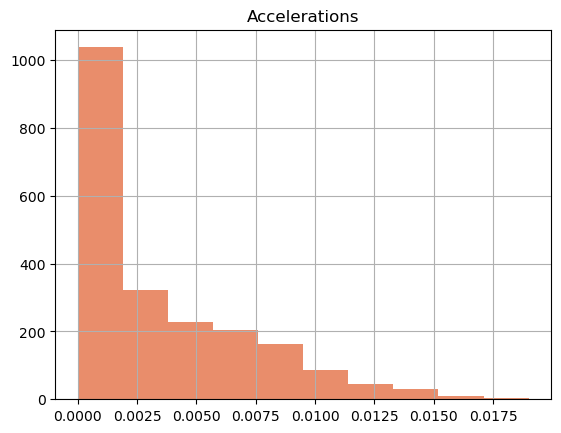

In [8]:
sns.set_palette(palette='flare')
df.accelerations.hist()
plt.title('Accelerations');

(array([2.052e+03, 3.400e+01, 9.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        5.000e+00, 9.000e+00, 4.000e+00, 9.000e+00]),
 array([0.    , 0.0481, 0.0962, 0.1443, 0.1924, 0.2405, 0.2886, 0.3367,
        0.3848, 0.4329, 0.481 ]),
 <BarContainer object of 10 artists>)

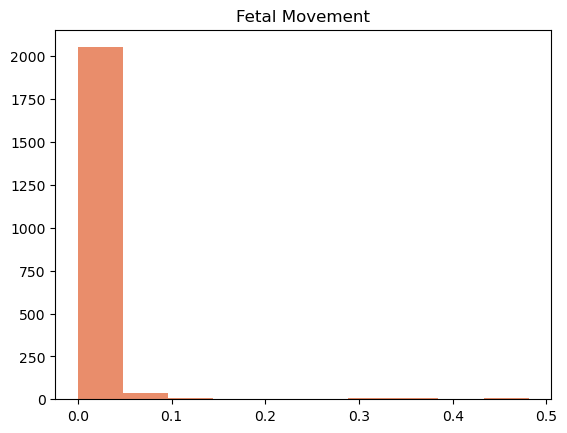

In [9]:
plt.title('Fetal Movement');
plt.hist(x=df['fetal_movement'])

(array([2.052e+03, 3.400e+01, 9.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        5.000e+00, 9.000e+00, 4.000e+00, 9.000e+00]),
 array([0.    , 0.0481, 0.0962, 0.1443, 0.1924, 0.2405, 0.2886, 0.3367,
        0.3848, 0.4329, 0.481 ]),
 <BarContainer object of 10 artists>)

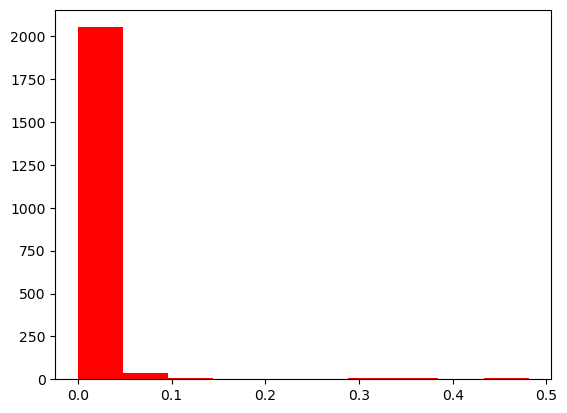

In [10]:
plt.hist(x=df['fetal_movement'],color='red')

In [11]:
df.severe_decelerations.value_counts()
# only 7 values are there

severe_decelerations
0.000    2119
0.001       7
Name: count, dtype: int64

Text(0.5, 1.0, 'Abnormal Short-Term Variability')

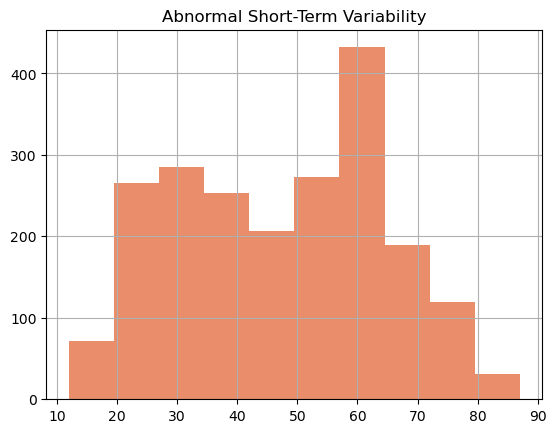

In [12]:
df.abnormal_short_term_variability.hist()
plt.title('Abnormal Short-Term Variability')

In [13]:
df.fetal_health.value_counts()
# thats our target column

fetal_health
1.000    1655
2.000     295
3.000     176
Name: count, dtype: int64

In [14]:
corr=df.corr()

<Axes: >

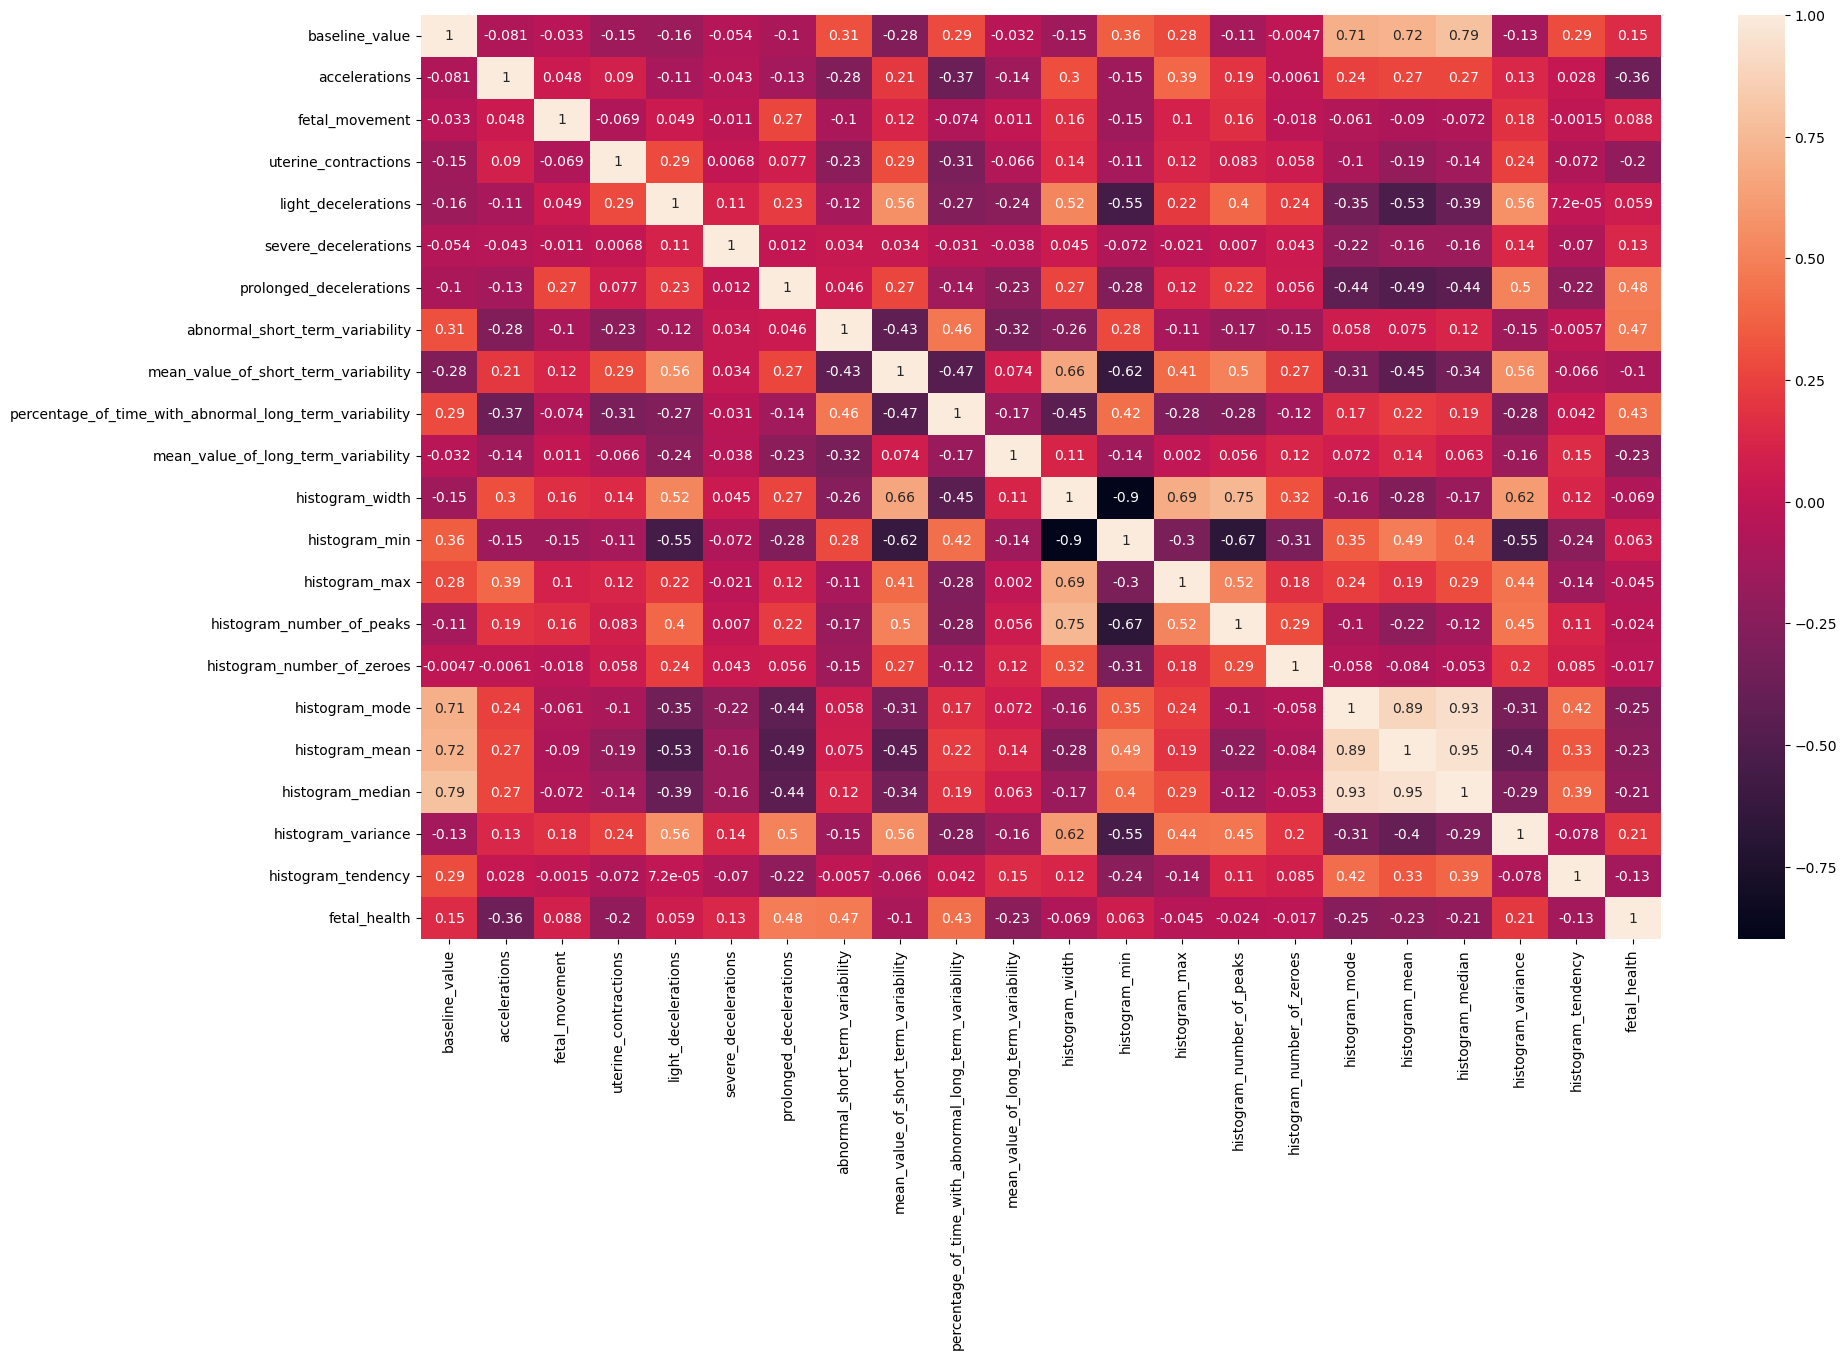

In [15]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr,annot=True)

In [16]:
df.corr()['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000
prolonged_decelerations                                   0.485
abnormal_short_term_variability                           0.471
percentage_of_time_with_abnormal_long_term_variability    0.426
histogram_variance                                        0.207
baseline_value                                            0.148
severe_decelerations                                      0.132
fetal_movement                                            0.088
histogram_min                                             0.063
light_decelerations                                       0.059
histogram_number_of_zeroes                               -0.017
histogram_number_of_peaks                                -0.024
histogram_max                                            -0.045
histogram_width                                          -0.069
mean_value_of_short_term_variability                     -0.103
histogram_tendency                      

The feature showing the strongest correlation with `fetal health` is `prolonged decelerations`, with a correlation of `0.485`. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability

Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

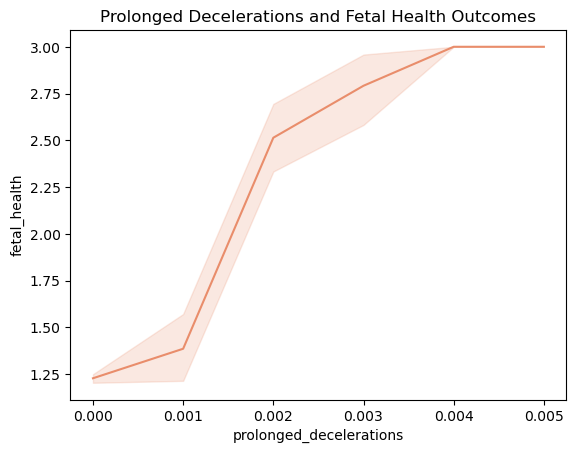

In [17]:
sns.lineplot(x='prolonged_decelerations',y='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

###### This lineplot clearly shows the relationship between prolonged decelerations of fetal heart rate and fetal health outcome. The longer amount of time observed with prolonged decelerations, the more at-risk the health outcome was likely to be.

C:\Users\surya\AppData\Local\Temp\ipykernel_25120\1380983171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['baseline_value'])


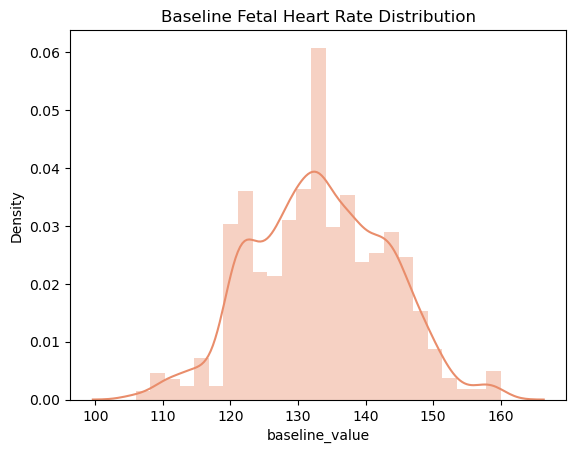

In [18]:
sns.distplot(df['baseline_value'])
plt.title('Baseline Fetal Heart Rate Distribution');

<Figure size 2000x1000 with 0 Axes>

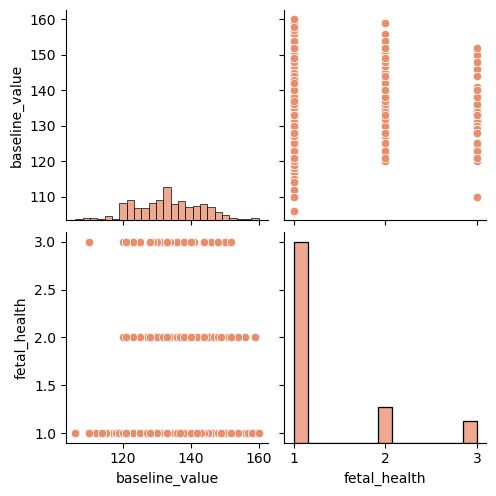

<Figure size 2000x1000 with 0 Axes>

In [19]:
sns.pairplot(df[['baseline_value', 'fetal_health']])
plt.figure(figsize=(20,10))

In [20]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc4fc2ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc50d4db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc502f8cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc50d4ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc50d4f450>],
 'means': []}

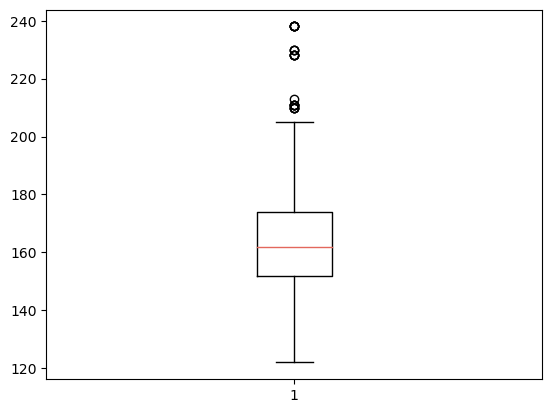

In [21]:
plt.boxplot(df['histogram_max'])

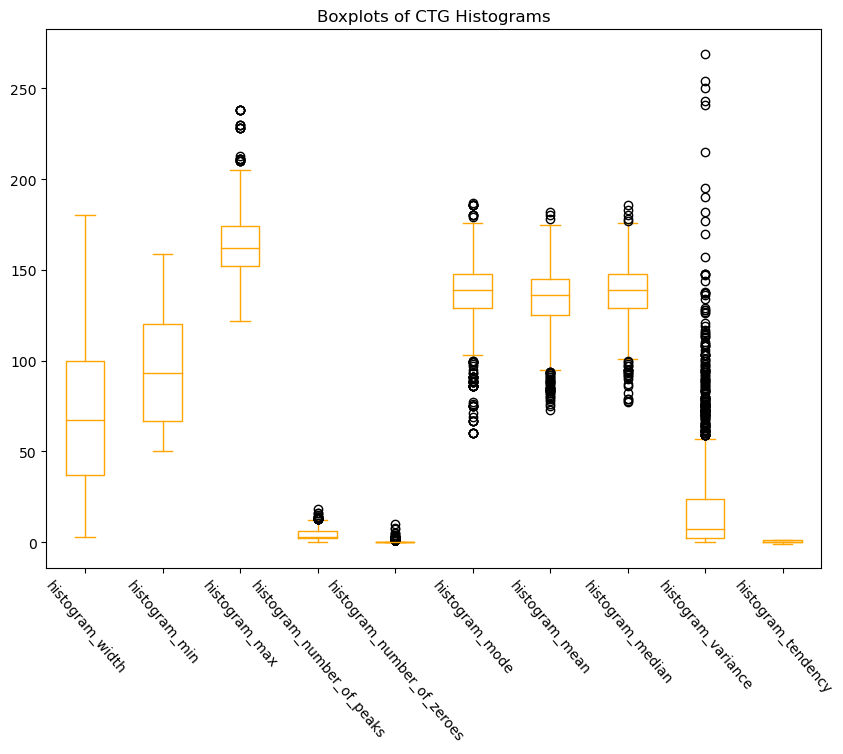

In [22]:
df[histogram_columns].plot(kind='box',grid=False, color='orange', figsize=(10,7));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

In [23]:
# Data Preparation

In [24]:
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [25]:
df['fetal_health'].value_counts()

1.000    1655
2.000     295
3.000     176
Name: fetal_health, dtype: int64

Here 1 corresponds to Normal and 2,3 corresponds to Risk

<Axes: xlabel='fetal_health', ylabel='Count'>

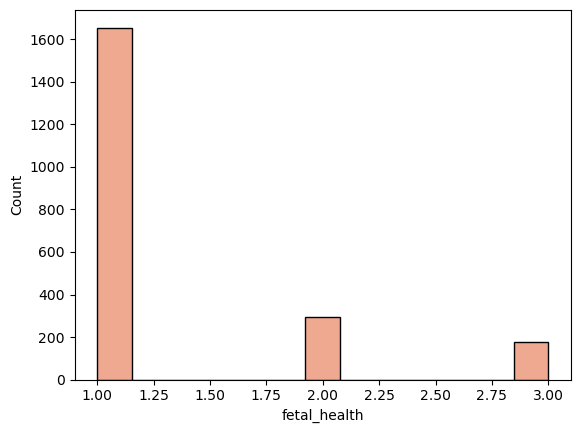

In [26]:
sns.histplot(data=df,x='fetal_health')

In [27]:
#Combining 2,3 into a one column as the data is very imbalanced

`Feature Engineering`

In [18]:
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

In [19]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health', 'fh_outcome'],
      dtype='object')

In [20]:
df.drop(columns='fetal_health',axis=1,inplace=True)

In [21]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fh_outcome'],
      dtype='object')

In [22]:
df['fh_outcome'].value_counts()

fh_outcome
Normal     1655
At Risk     471
Name: count, dtype: int64

<Axes: xlabel='fh_outcome', ylabel='Count'>

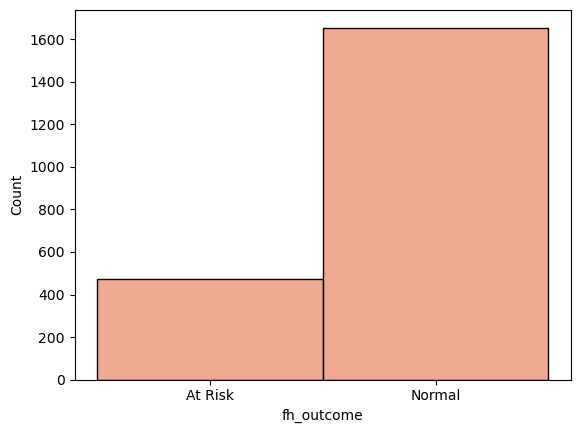

In [33]:
sns.histplot(data=df,x='fh_outcome')

`Encoding`

In [23]:
df=pd.get_dummies(df,columns=['fh_outcome'])

In [24]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,True,False
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,False,True
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,False,True
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,False,True
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,False,True


In [25]:
df.drop(columns='fh_outcome_Normal',axis=1,inplace=True)

In [26]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fh_outcome_At Risk'],
      dtype='object')

In [27]:
df=df.rename(columns={'fh_outcome_At Risk':'Target'})

In [28]:
df['Target'].value_counts()

Target
False    1655
True      471
Name: count, dtype: int64

([<matplotlib.axis.YTick at 0x24cd37f28d0>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'At Risk')])

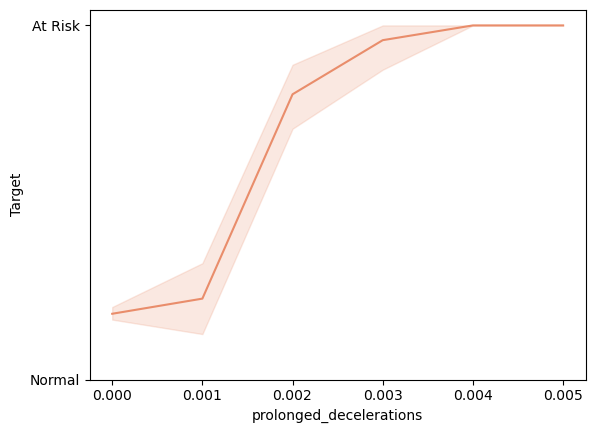

In [29]:
sns.lineplot(x='prolonged_decelerations',y='Target', data=df, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)

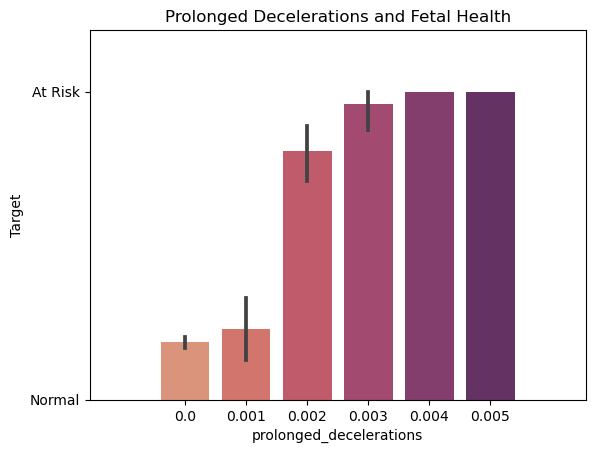

In [41]:
sns.barplot(x='prolonged_decelerations',y='Target', data=df)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

This shows that more the prolonged_decelerations more is the risk

###### Next Feature which is highly correlated with Fetal health is  `percentage_of_time_with_abnormal_long_term_variability`

<Figure size 1200x800 with 0 Axes>

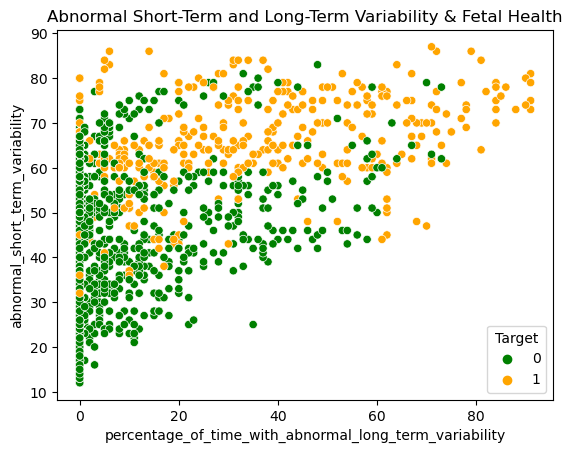

<Figure size 1200x800 with 0 Axes>

In [42]:
custom_palette = {0: 'green', 1: 'orange'}
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='Target', data=df,palette=custom_palette)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');
plt.figure(figsize=(12,8))

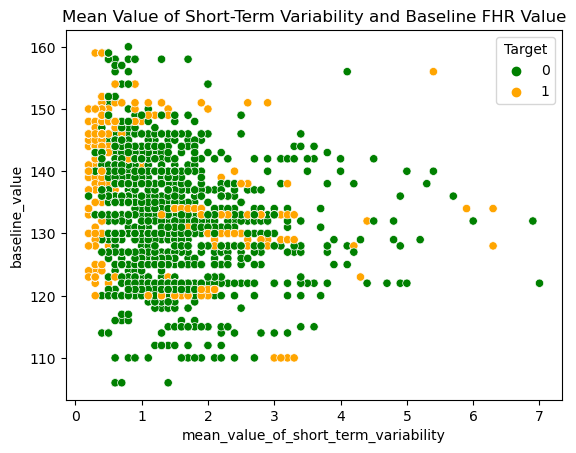

In [43]:
sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline_value", hue='Target', data=df,palette=custom_palette)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

`Model`

In [30]:
X=df.drop(columns='Target',axis=1)
y=df['Target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred=lr.predict(X_test)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

              precision    recall  f1-score   support

       False       0.90      0.96      0.93       501
        True       0.82      0.62      0.71       137

    accuracy                           0.89       638
   macro avg       0.86      0.79      0.82       638
weighted avg       0.88      0.89      0.88       638

Recall score:  0.6204379562043796
Accuarcy score:  0.8887147335423198


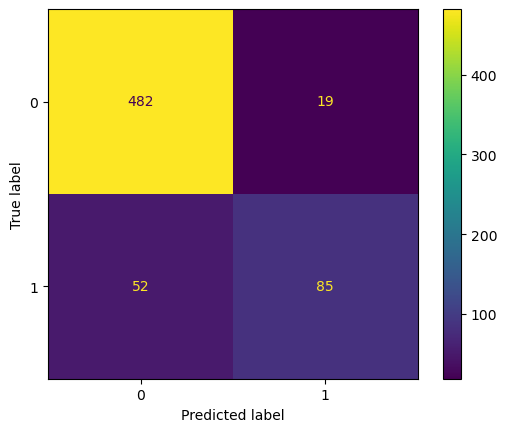

In [38]:
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))
print('Accuarcy score: ',accuracy_score(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()

In [22]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       501
           1       0.95      0.74      0.84       137

    accuracy                           0.94       638
   macro avg       0.94      0.87      0.90       638
weighted avg       0.94      0.94      0.93       638

Recall score:  0.7445255474452555
Accuarcy score:  0.9373040752351097


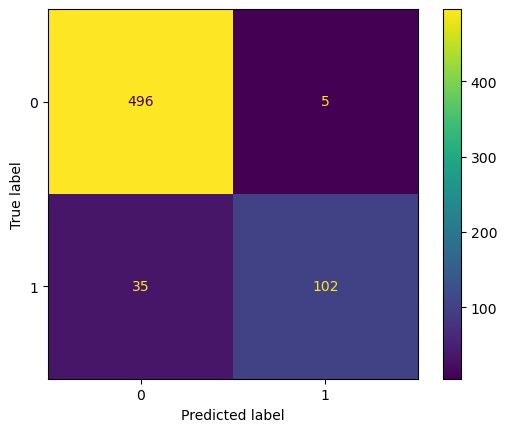

In [23]:
y_pred2 = tree_clf.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred2))
disp.plot()
print(classification_report(y_test, y_pred2))
print('Recall score: ',recall_score(y_test, y_pred2))
print('Accuarcy score: ',accuracy_score(y_test, y_pred2))

###### While an accuracy of 94% sounds like a good metric, it is important to note that this model missed 29 members of the at-risk fetal health class. Since we are dealing with the health outcomes and lives of babies, this is simply not acceptable. I will be evaluating my models with a focus on recall/sensitivity in order to minimize false negatives or Type II errors. In this case, the baseline recall value is 80%.

In [24]:
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       501
           1       0.76      0.91      0.82       137

    accuracy                           0.92       638
   macro avg       0.86      0.91      0.88       638
weighted avg       0.93      0.92      0.92       638

Recall score:  0.9051094890510949
Accuarcy score:  0.9169278996865203


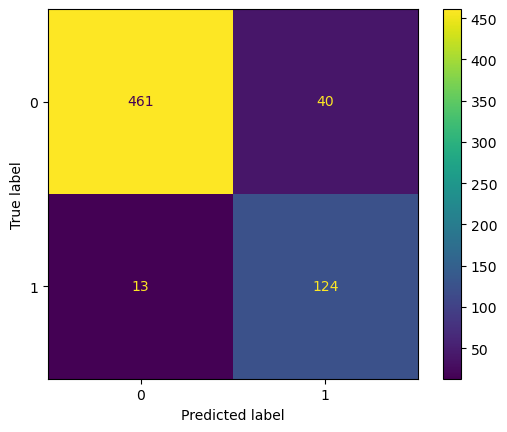

In [25]:
y_pred2 = tree_clf2.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred2))
disp.plot()
print(classification_report(y_test, y_pred2))
print('Recall score: ',recall_score(y_test, y_pred2))
print('Accuarcy score: ',accuracy_score(y_test, y_pred2))

In [56]:
# Recall Value has increased

`Overall Model Implementation without Hyperparameter Tuning`

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=10),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=60, random_state=10),
    "SVC LINEAR": SVC(kernel="linear"),
    "SVC RBF": SVC(kernel='rbf'),
    "SVC SIGMOID": SVC(kernel='sigmoid')
}

In [27]:
from sklearn.metrics import accuracy_score, classification_report

predicted = []
acc=[]
mod = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    mod.append(list(models.keys())[i])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    acc_train = accuracy_score(y_train, y_train_pred)
    print(list(models.keys())[i], ": Train Accuracy =", acc_train * 100, "%")
    print("Classification Report for Training set:")
    print(classification_report(y_train, y_train_pred))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    acc_test = accuracy_score(y_test, y_test_pred)
    rc_test = recall_score(y_test, y_test_pred)
    print(list(models.keys())[i], ": Recall score =", rc_test * 100, "%")
    print("Classification Report for Test set:")
    print(classification_report(y_test, y_test_pred))
    
    print('----------------------------------')
    
    predicted.append(rc_test * 100)
    acc.append(acc_test * 100)

    print('=' * 35)
    print('\n')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
Logistic Regression : Train Accuracy = 88.84408602150538 %
Classification Report for Training set:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1154
           1       0.80      0.67      0.73       334

    accuracy                           0.89      1488
   macro avg       0.86      0.81      0.83      1488
weighted avg       0.88      0.89      0.88      1488

----------------------------------
Model performance for Test set
Logistic Regression : Recall score = 61.31386861313869 %
Classification Report for Test set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       501
           1       0.82      0.61      0.70       137

    accuracy                           0.89       638
   macro avg       0.86      0.79      0.82       638
weighted avg       0.88      0.89      0.88       638

---------------------------------

In [28]:
data = pd.DataFrame({'Model': mod, 'Recall Score': predicted,'Accuracy': acc})
data

,Model,Recall Score,Accuracy
0,Logistic Regression,61.314,88.715
1,Decision Tree Classifier,81.022,94.201
2,Random Forest Classifier,84.672,96.238
3,SVC LINEAR,67.153,89.498
4,SVC RBF,56.934,88.871
5,SVC SIGMOID,19.708,76.489


`Hyperparameter Tuned`

In [40]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [41]:
# Scaling the Data
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [63]:

from sklearn.preprocessing import StandardScaler

param_range_small = [1.0, 0.5, 0.1]

lr = LogisticRegression(class_weight='balanced', random_state=42)
scaler = StandardScaler()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': param_range_small,
    'solver': ['liblinear']
}

gs_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='recall',
    cv=10,
    n_jobs=-1
)
    

def find_best_recall(gridsearch, X_train, y_train, X_test, y_test):
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gridsearch.fit(X_train_scaled, y_train)
    
    print('Best params: %s' % gridsearch.best_params_)
    print('Best training recall: %.3f' % gridsearch.best_score_)
    
    y_pred = gridsearch.predict(X_test_scaled)
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ', recall_score(y_test, y_pred))


# Assuming X_train, y_train, X_test, y_test are already defined
find_best_recall(gs_lr, X_train, y_train, X_test, y_test)

Best params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best training recall: 0.935
Test set recall score for best params: 0.919 
[[456  98]
 [ 12 136]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       554
           1       0.58      0.92      0.71       148

    accuracy                           0.84       702
   macro avg       0.78      0.87      0.80       702
weighted avg       0.89      0.84      0.85       702

Recall score:  0.918918918918919


In [67]:
from sklearn.ensemble import RandomForestClassifier

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': param_range,
    'max_depth': param_range,
    'min_samples_split': param_range[1:]
}

gs_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',
    cv=10,
    n_jobs=-1
)

find_best_recall(gs_rf, X_train_scaled, y_train, X_test_scaled, y_test)

Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best training recall: 0.913
Test set recall score for best params: 0.926 
[[512  42]
 [ 11 137]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       554
           1       0.77      0.93      0.84       148

    accuracy                           0.92       702
   macro avg       0.87      0.92      0.89       702
weighted avg       0.93      0.92      0.93       702

Recall score:  0.9256756756756757


In [42]:
# Training Random Forest Classifier with Best Params

rf = RandomForestClassifier(criterion='entropy',max_depth = 20 ,min_samples_leaf = 9 ,min_samples_split = 4,random_state=42)
rf.fit(X_train_scaled,y_train)

y_pred = rf.predict(X_test_scaled)
print('Recall score: ', recall_score(y_test, y_pred))
print('Accuracy Value on Test set : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Recall score:  0.8029197080291971
Accuracy Value on Test set :  0.9529780564263323
[[498   3]
 [ 27 110]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       501
        True       0.97      0.80      0.88       137

    accuracy                           0.95       638
   macro avg       0.96      0.90      0.93       638
weighted avg       0.95      0.95      0.95       638



`App Preparation`

In [43]:
import joblib

In [44]:
joblib.dump(rf,'fetal_health_classifier.sav')

['fetal_health_classifier.sav']